In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy: 0.9736842105263158
Test Accuracy: 0.9736842105263158
Confusion Matrix:
 [[35  3]
 [ 0 76]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.96      1.00      0.98        76

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



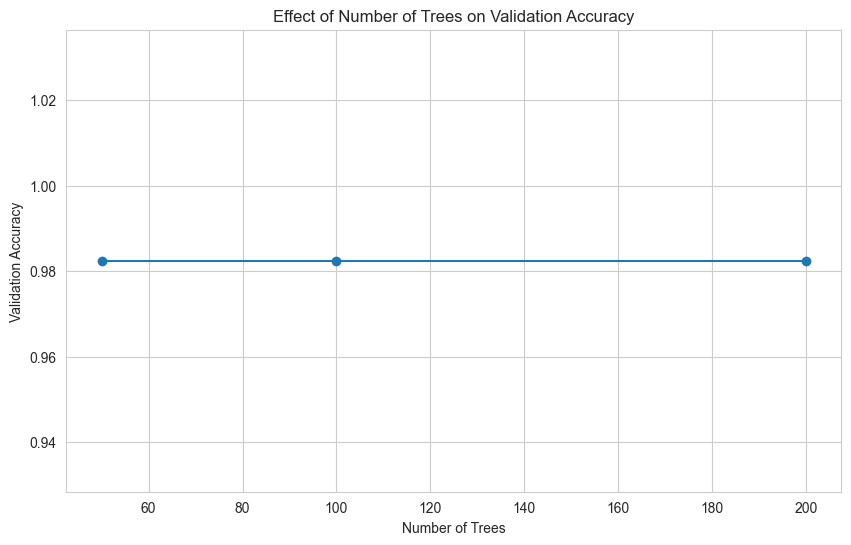

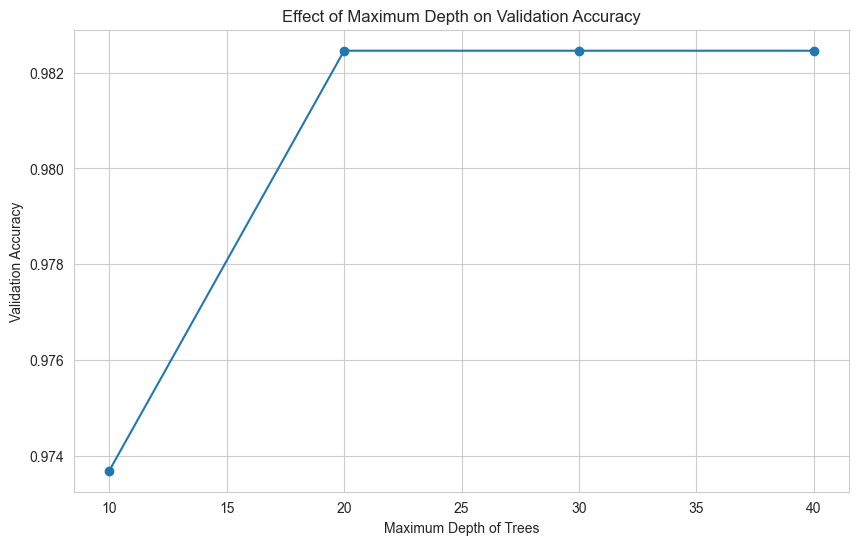

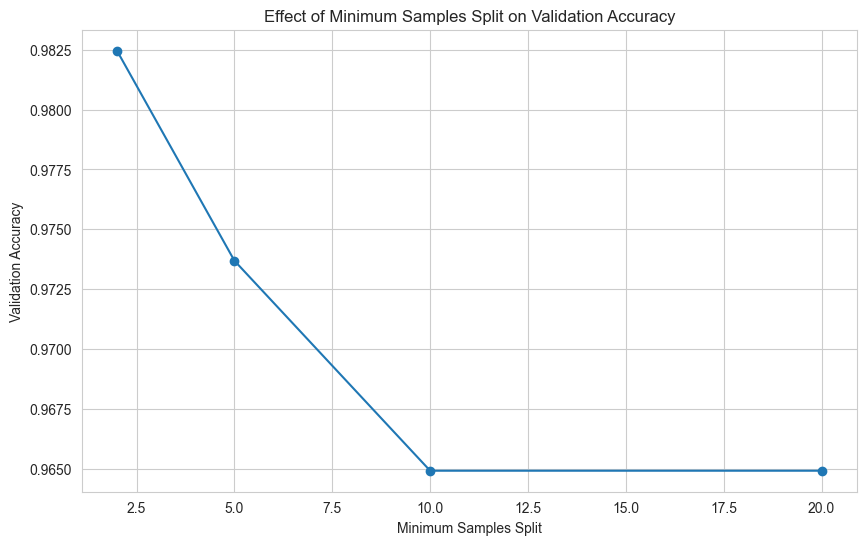

In [19]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def calculate_accuracy(param_name, param_values):
    accuracies = []
    for value in param_values:
        rf = RandomForestClassifier(random_state=42, **{param_name: value})
        rf.fit(X_train, y_train)
        y_val_pred = rf.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(accuracy)
    return accuracies

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

best_rf.fit(X_train, y_train)

y_val_pred = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

n_estimators_range = param_grid['n_estimators']
val_accuracies = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_val_pred = rf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, val_accuracies, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Number of Trees on Validation Accuracy')
plt.grid(True)
plt.show()

max_depth_values = [10, 20, 30, 40]
max_depth_accuracies = calculate_accuracy('max_depth', max_depth_values)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, max_depth_accuracies, marker='o')
plt.xlabel('Maximum Depth of Trees')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Maximum Depth on Validation Accuracy')
plt.grid(True)
plt.show()

min_samples_split_values = [2, 5, 10, 20]
min_samples_split_accuracies = calculate_accuracy('min_samples_split', min_samples_split_values)

plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, min_samples_split_accuracies, marker='o')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Minimum Samples Split on Validation Accuracy')
plt.grid(True)
plt.show()
